# Concatenate
* x1은 1에서 100, 311에서 410, 1에서 100의 총 (300, 3)의 모양
* x2는 101에서 200, 311에서 410, 101에서 200의 총 (300, 3)의 모양 
* 이 두 데이터셋이 앙상블이 되어 501에서 600이 나오는 구조 

## 1. 데이터

In [1]:
import numpy as np

* 각각 300개씩의 데이터를 가지고 있는 2개의 x 
* 100개의 데이터를 가지고 있는 1개의 y

In [2]:
x1 = np.array([range(100), range(311,411), range(100)])
x2 = np.array([range(101,201), range(311,411), range(101,201)])
y = np.array([range(501, 601)])
print(x1.shape)
print(y.shape)

(3, 100)
(1, 100)


#### 모양 바꿔주기 

In [3]:
x1 = np.transpose(x1)
x2 = np.transpose(x2)
y = np.transpose(y)
print(x1.shape)
print(y.shape)

(100, 3)
(100, 1)


#### train, test, validation 분리 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=66, test_size=0.4, shuffle=False)
x1_val, x1_test, y_val, y_test = train_test_split(x1_test, y_test, random_state=66, test_size=0.5, shuffle=False)
x2_train, x2_test = train_test_split(x2, random_state=66, test_size=0.4, shuffle=False)
x2_val, x2_test= train_test_split(x2_test, random_state=66, test_size=0.5, shuffle = False)

## 2 모델 구성 

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

#### 서로 다른 2개의 레이어 만들기

In [7]:
input1 = Input(shape=(3,))
dense1 = Dense(100, activation='relu')(input1)
dense1_2 = Dense(30)(dense1)
dense1_3 = Dense(7)(dense1_2)

input2 = Input(shape=(3,))
dense2 = Dense(50, activation='relu')(input2)
dense2_2 = Dense(7)(dense2)

#### 두가지 모델 합치기 

In [8]:
from tensorflow.keras.layers import concatenate

In [9]:
merge1 = concatenate([dense1_3, dense2_2])

In [10]:
model1 = Dense(10)(merge1)
model2 = Dense(5)(model1)
output = Dense(1)(model2)

In [11]:
model = Model(inputs=[input1, input2], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          400         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           3030        dense[0][0]                      
______________________________________________________________________________________________

## 3. 훈련

In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit([x1_train, x2_train], y_train, epochs=100, batch_size=1, validation_data=([x1_val, x2_val] , y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/100
60/60 [==============================] - 1s 10ms/sample - loss: 62526.2501 - mse: 62526.2383 - val_loss: 612.0000 - val_mse: 611.9999
Epoch 2/100
60/60 [==============================] - 0s 2ms/sample - loss: 499.4471 - mse: 499.4472 - val_loss: 1948.4065 - val_mse: 1948.4062
Epoch 3/100
60/60 [==============================] - 0s 2ms/sample - loss: 232.0440 - mse: 232.0440 - val_loss: 1472.8462 - val_mse: 1472.8462
Epoch 4/100
60/60 [==============================] - 0s 2ms/sample - loss: 171.4564 - mse: 171.4564 - val_loss: 1048.7480 - val_mse: 1048.7480
Epoch 5/100
60/60 [==============================] - 0s 2ms/sample - loss: 125.2215 - mse: 125.2215 - val_loss: 290.4460 - val_mse: 290.4460
Epoch 6/100
60/60 [==============================] - 0s 2ms/sample - loss: 31.4163 - mse: 31.4163 - val_loss: 112.2841 - val_mse: 112.2841
Epoch 7/100
60/60 [==============================] - 0s 2ms/sample - loss: 13.8441 - mse: 13.8441 - v

60/60 [==============================] - 0s 2ms/sample - loss: 0.0077 - mse: 0.0077 - val_loss: 14.6647 - val_mse: 14.6647
Epoch 61/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0159 - mse: 0.0159 - val_loss: 16.3509 - val_mse: 16.3509
Epoch 62/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0083 - mse: 0.0083 - val_loss: 15.6286 - val_mse: 15.6286
Epoch 63/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0025 - mse: 0.0025 - val_loss: 15.0828 - val_mse: 15.0828
Epoch 64/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0042 - mse: 0.0042 - val_loss: 16.1590 - val_mse: 16.1590
Epoch 65/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0117 - mse: 0.0117 - val_loss: 15.1465 - val_mse: 15.1465
Epoch 66/100
60/60 [==============================] - 0s 2ms/sample - loss: 0.0034 - mse: 0.0034 - val_loss: 15.6773 - val_mse: 15.6773
Epoch 67/100
60/60 [==============================] - 0s 2ms/

## 4. 학습과정확인 

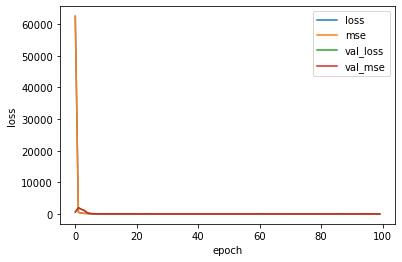

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 5. 평가 예측

In [14]:
loss, mse = model.evaluate([x1_test, x2_test], y_test, batch_size=1)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 1ms/sample - loss: 17.3456 - mse: 17.3456
loss :  17.345600885152816
mse :  17.3456


In [15]:
y_predict = model.predict([x1_test, x2_test])
for i in range(len(y_predict)):
    print(y_test[i], y_predict[i])

[581] [582.05133]
[582] [583.33923]
[583] [584.6271]
[584] [585.91486]
[585] [587.2028]
[586] [588.49054]
[587] [589.77844]
[588] [591.06635]
[589] [592.3542]
[590] [593.64197]
[591] [594.9298]
[592] [596.21765]
[593] [597.50555]
[594] [598.79346]
[595] [600.0893]
[596] [601.40186]
[597] [602.7145]
[598] [604.02704]
[599] [605.3395]
[600] [606.65216]


In [16]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  4.164826924197561


In [17]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.4783223065106492
